## Partial Dependance Plot (PDP)
Understandable AI - https://christophm.github.io/interpretable-ml-book/pdp.html

ICE Plots = https://arxiv.org/pdf/1309.6392.pdf

In [15]:
#Note that the following code only works for GBMs!  A general solution is going to be pushed in sklearn 
# see:
# https://github.com/scikit-learn/scikit-learn/pull/12599
from __future__ import print_function
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D

from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble.partial_dependence import plot_partial_dependence
from sklearn.ensemble.partial_dependence import partial_dependence
from sklearn.datasets.california_housing import fetch_california_housing
from sklearn.datasets import load_iris
import pandas as pd
import pandas_profiling

%matplotlib inline  

Automatically created module for IPython interactive environment


In [19]:
iris = load_iris()
irisdf = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])
irisdf

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
5,5.4,3.9,1.7,0.4,0.0
6,4.6,3.4,1.4,0.3,0.0
7,5.0,3.4,1.5,0.2,0.0
8,4.4,2.9,1.4,0.2,0.0
9,4.9,3.1,1.5,0.1,0.0


In [21]:
cal_housing = fetch_california_housing()
type(cal_housing)
cal_housingdf = pd.DataFrame(data= np.c_[cal_housing['data'], cal_housing['target']],
                             columns= cal_housing['feature_names'] + ['target'])
cal_housingdf

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
5,4.0368,52.0,4.761658,1.103627,413.0,2.139896,37.85,-122.25,2.697
6,3.6591,52.0,4.931907,0.951362,1094.0,2.128405,37.84,-122.25,2.992
7,3.1200,52.0,4.797527,1.061824,1157.0,1.788253,37.84,-122.25,2.414
8,2.0804,42.0,4.294118,1.117647,1206.0,2.026891,37.84,-122.26,2.267
9,3.6912,52.0,4.970588,0.990196,1551.0,2.172269,37.84,-122.25,2.611


In [22]:
pandas_profiling.ProfileReport(cal_housingdf)

Number of variables,9
Number of observations,20640
Total Missing (%),0.0%
Total size in memory,1.4 MiB
Average record size in memory,72.0 B
Numeric,9
Categorical,0
Date,0
Text (Unique),0
Rejected,0
Distinct count,14233


In [23]:
#train GBM
# split 80/20 train-test
X_train, X_test, y_train, y_test = train_test_split(cal_housing.data,
                                                    cal_housing.target,
                                                    test_size=0.2,
                                                    random_state=1)
names = cal_housing.feature_names

print("Training GBRT...")
clf = GradientBoostingRegressor(n_estimators=100, max_depth=4,
                                    learning_rate=0.1, loss='huber',
                                    random_state=1)
clf.fit(X_train, y_train)
print(" done.")

Training GBRT...
 done.


In [ ]:
## Traditional (sklearn) method for creating PDP

Convenience plot with ``partial_dependence_plots``
Custom 3d plot via ``partial_dependence``


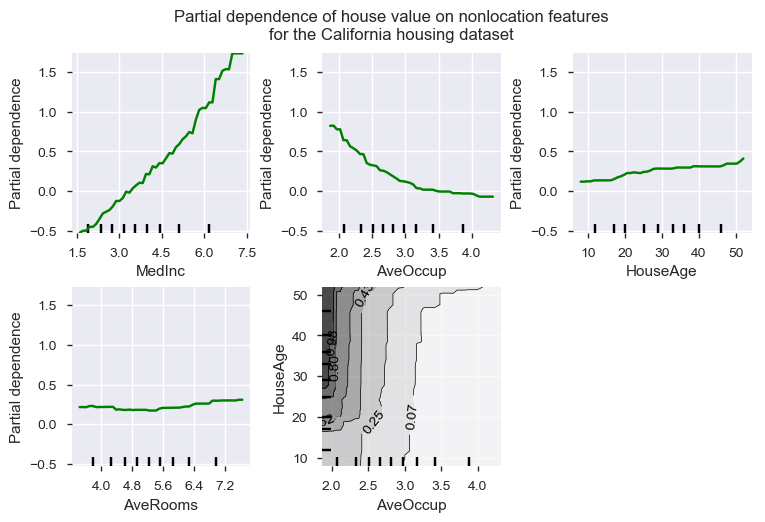

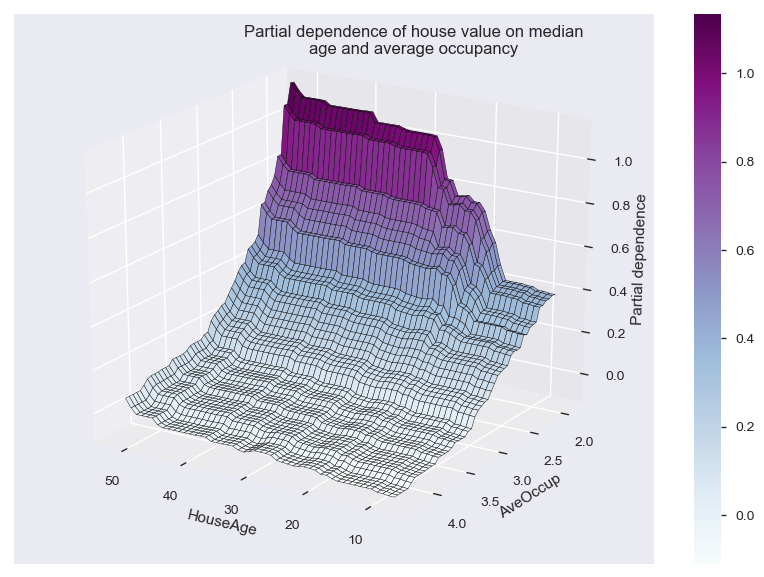

In [31]:
print('Convenience plot with ``partial_dependence_plots``')

features = [0, 5, 1, 2, (5, 1)]
fig, axs = plot_partial_dependence(clf, X_train, features,
                                       feature_names=names,
                                       n_jobs=3, grid_resolution=50)
fig.suptitle('Partial dependence of house value on nonlocation features\n'
                 'for the California housing dataset')
plt.subplots_adjust(top=0.9)  # tight_layout causes overlap with suptitle

print('Custom 3d plot via ``partial_dependence``')
fig = plt.figure()

target_feature = (1, 5)
pdp, axes = partial_dependence(clf, target_feature,
                                   X=X_train, grid_resolution=50)
XX, YY = np.meshgrid(axes[0], axes[1])
Z = pdp[0].reshape(list(map(np.size, axes))).T
ax = Axes3D(fig)
surf = ax.plot_surface(XX, YY, Z, rstride=1, cstride=1,
                           cmap=plt.cm.BuPu, edgecolor='k')
ax.set_xlabel(names[target_feature[0]])
ax.set_ylabel(names[target_feature[1]])
ax.set_zlabel('Partial dependence')
    #  pretty init view
ax.view_init(elev=22, azim=122)
plt.colorbar(surf)
plt.suptitle('Partial dependence of house value on median\n'
                 'age and average occupancy')
plt.subplots_adjust(top=0.9)

plt.show()